In [10]:
def DataLoader0():
    def reader():
        for i in range(1000):
            yield i
    return reader

In [15]:
test = paddle.batch(DataLoader0(), batch_size=10)

# for i in test():
#     print(i)
it = test()
print(next(it))
print(next(test()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [10]:
from dataset import DataLoader, make_dataset

loader = DataLoader(root='dataset/selfie2anime/testA', batch_size=1, shuffle=False)
l = make_dataset('dataset/selfie2anime/testA')

In [16]:
from PIL import Image

img = Image.open(l[0][0])

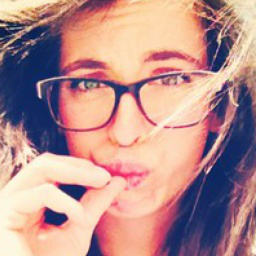

In [17]:
img

In [7]:
 import paddle
 from dataset import DataLoader1

loader0 = paddle.batch(DataLoader0(), batch_size=1)
loader1 = paddle.batch(DataLoader1(root='dataset/selfie2anime/testA'), batch_size=1)

ImportError: cannot import name 'DataLoader1' from 'dataset' (/Users/curiosity/Desktop/Dev/Code/Paddle/UGATIT-paddle/dataset.py)

In [3]:
from dataset import DataLoader
loader = DataLoader(root='dataset/selfie2anime/testA')

In [2]:
from networks import ResnetGenerator

genA2B = ResnetGenerator(input_nc=3, output_nc=3, ngf=3, n_blocks=4, img_size=256, light=True)

In [4]:
from networks import Discriminator

disGA = Discriminator(input_nc=3, ndf=3, n_layers=7)

In [9]:
import paddle

target = paddle.fluid.layers.ones([10, 64], dtype='float32')

In [13]:
target

name: "fill_constant_0.tmp_0"
type {
  type: LOD_TENSOR
  lod_tensor {
    tensor {
      data_type: FP32
      dims: 10
      dims: 64
    }
  }
}
persistable: false

In [9]:
with paddle.fluid.dygraph.guard():
    target = paddle.fluid.layers.ones([10, 64], dtype='float32')  # 64 classes, batch size = 10
    output = paddle.fluid.layers.full(shape=[10, 64], dtype='float32', fill_value=1.5)  # A prediction (logit)
    loss = paddle.fluid.layers.sigmoid_cross_entropy_with_logits(
    x=output,
    label=target,
    ignore_index=-1,
    normalize=True)
    loss = paddle.fluid.layers.reduce_sum(loss)
    print(loss.numpy())

[0.20141354]


In [27]:
import torch


target = torch.ones([10, 64], dtype=torch.float32)  # 64 classes, batch size = 10
output = torch.full([10, 64], 1.5)  # A prediction (logit)
pos_weight = torch.ones([64])  # All weights are equal to 1
criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)
criterion(output, target)  # -log(sigmoid(1.5))

tensor(0.2014)

In [35]:
loss = torch.nn.MSELoss()
input = torch.ones([10, 64], dtype=torch.float32)
target = torch.full([10, 64], 1.5)
output = loss(input, target)
print(output)

tensor(0.2500)


In [37]:
with paddle.fluid.dygraph.guard():
    input = paddle.fluid.layers.ones([10,64], dtype='float32')
    target = paddle.fluid.layers.full(shape=[10, 64], dtype='float32', fill_value=1.5)
    output = paddle.fluid.layers.mse_loss(input, target)
    print(output)

name tmp_1, dtype: VarType.FP32 shape: [1] 	lod: {}
	dim: 1
	layout: NCHW
	dtype: float
	data: [0.25]



In [5]:
def foo(a):
    print(a)

a = foo
a('asd')

asd


In [1]:
import os
from dataset import DataLoader
import transforms
import paddle

train_transform = [
    transforms.RandomHorizontalFlip(),
    transforms.Resize((256 + 30, 256+30)),
    transforms.RandomCrop(self.img_size),
    transforms.ToArray(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    transforms.ToTensor()
]

trainA = os.path.join('dataset', 'selfie2anime', 'trainA')
trainA_loader = DataLoader(trainA, batch_size=1, transforms=train_transform, shuffle=True)

In [2]:
trainA_iter = trainA_loader()

In [3]:
with paddle.fluid.dygraph.guard():
    a = next(trainA_iter)[0][0]

(286, 286, 3)
(286, 286, 3)


In [8]:
a.numpy().shape

(1, 3, 286, 286)